In [2]:
print("hello world")

hello world


In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) #Find .env file on my system and load openai API key

openai.api_key = os.getenv('OPENAI_API_KEY')

client = openai.OpenAI()

In [2]:
def get_completed(prompt, model="gpt-3.5-turbo"):
    messages = [{'role': 'user', 'content': prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0,
    )
    return response.choices[0].message.content


In [6]:
text = f"""
Uganda.
"""
prompt = f"""
write an article about the country mentioned in the text delimited by \
triple backticks.
```{text}```
output in HTML format.
"""
response = get_completed(prompt)
print(response)

<!DOCTYPE html>
<html>
<head>
<title>Uganda</title>
</head>
<body>

<h1>Uganda</h1>

<p>Uganda is a landlocked country located in East Africa. It is bordered by Kenya to the east, South Sudan to the north, the Democratic Republic of the Congo to the west, Rwanda to the southwest, and Tanzania to the south. The capital city of Uganda is Kampala.</p>

<p>Uganda is known for its diverse wildlife, including the famous mountain gorillas in Bwindi Impenetrable National Park. The country also boasts stunning landscapes such as the Rwenzori Mountains and the source of the Nile River at Lake Victoria.</p>

<p>Uganda has a rich cultural heritage with over 56 different ethnic groups, each with its own language and traditions. The official languages of Uganda are English and Swahili.</p>

<p>The economy of Uganda is largely dependent on agriculture, with coffee being a major export crop. Tourism is also a growing industry in the country, attracting visitors to its national parks and wildlife reser

In [7]:
from IPython.core.display import HTML, JSON

In [8]:
display(HTML(response))

In [ ]:
from transformers import GPT2Tokenizer
import warnings

# None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers,
# configuration and file/data utilities can be used.
warnings.filterwarnings("ignore", category=DeprecationWarning)

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Input text
text = response

# Tokenize the text and count tokens
tokens = tokenizer.encode(text)
print(len(tokens))

In [15]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Input text
text = response

# Tokenize the text and count tokens
tokens = tokenizer.encode(text)
print(len(tokens))

257


In [22]:
import base64
from openai import OpenAI

client = OpenAI()

def grab_audio():
    completion = client.chat.completions.create(
        model="gpt-4o-audio-preview",
        modalities=["text", "audio"],
        audio={"voice": "shimmer", "format": "wav"},
        messages=[
            {
                "role": "user",
                "content": "Hey Julius, this is a perfect day to make some money"
            }
        ]
    )
    
    return completion.choices[0].message.audio.data

wav_bytes = base64.b64decode(grab_audio())
with open("promp.wav", "wb") as f:
    f.write(wav_bytes)

In [2]:
from pathlib import Path
from openai import OpenAI
import warnings

# Ignore DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

client = OpenAI()
speech_file_path = Path('C:/Users/ssekw/Documents/Jupyter Notebook/kik.mp3')
with client.audio.speech.with_streaming_response.create(
    model="tts-1-hd-1106",
    voice="ash",
    input="Good morning Mr. JIMMY!. THIS IS A PERFECT DAY TO MAKE SOME MONEY!",
) as response:
    response.stream_to_file(speech_file_path)

In [6]:
from pathlib import Path
import openai
import os
import time
import warnings
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

openai.api_key = os.getenv('OPENAI_API_KEY')

# Ignore DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

client = openai.OpenAI()

documents_folder = os.path.join(os.environ['USERPROFILE'], 'Documents')

def generate_speech(speech_file_path, input_text, voice): 
    """ Generate speech using the TTS model and save to file.
    Args: speech_file_path (str): Path to save the generated speech.
    input_text (str): Text to synthesize into speech. 
    voice (str): voice to be used in the audio.""" 
    with client.audio.speech.with_streaming_response.create( 
        model="tts-1-hd-1106", 
        voice=voice, 
        input=input_text, 
    ) as response: 
        response.stream_to_file(speech_file_path)

speech_file_path = Path(f"{documents_folder}/Jupyter Notebook/" + input("Please Enter file_name:") + ".mp3")
input_text = input("Please enter text to turn into speech:")
voice = input("Please choose desired voice from (alloy, ash, coral, echo, fable, onyx, nova, sage and shimmer): ")

generate_speech(speech_file_path, input_text, voice)

Please Enter file_name: money
Please enter text to turn into speech: My name is Maximus Decimus Meridius. Commander of the Armies of the North, General of the Felix Legions, Loyal servant to the true emperor, Marcus Aurelius, Father to a murdered son, Husband to a murdered wife, And I will have my vengeance -- in this life or the next.
Please choose desired voice from (alloy, ash, coral, echo, fable, onyx, nova, sage and shimmer):  ash


In [3]:
from pathlib import Path
import openai
import os
import time
import warnings
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

openai.api_key = os.getenv('OPENAI_API_KEY')

# Ignore DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

client = openai.OpenAI()

documents_folder = os.path.join(os.environ['USERPROFILE'], 'Documents')

def generate_speech(speech_file_path, input_text, voice): 
    """ Generate speech using the TTS model and save to file.
    Args: speech_file_path (str): Path to save the generated speech.
    input_text (str): Text to synthesize into speech. 
    voice (str): voice to be used in the audio.""" 
    start_time = time.time()
    
    with client.audio.speech.with_streaming_response.create( 
        model="tts-1-hd-1106", 
        voice=voice, 
        input=input_text, 
    ) as response: 
        response.stream_to_file(speech_file_path)
    
    end_time = time.time()
    response_time = round(end_time - start_time, 2)
    print(f"Response time: {response_time} seconds")

speech_file_path = Path(f"{documents_folder}/Jupyter Notebook/" + input("Please Enter file_name:") + ".mp3")
input_text = input("Please enter text to turn into speech:")
voice = input("Please choose desired voice from (alloy, ash, coral, echo, fable, onyx, nova, sage and shimmer): ")

generate_speech(speech_file_path, input_text, voice)

Please Enter file_name: money
Please enter text to turn into speech: How fast should I speak to you?
Please choose desired voice from (alloy, ash, coral, echo, fable, onyx, nova, sage and shimmer):  coral


Response time: 3.14 seconds


The code below simulates response times and output tokens for the LLMs provided.

In [ ]:
import matplotlib.pyplot as plt
import time
import random

# Model data
models = [
    {"name": "Llama 3 70B", "cost_per_million_tokens": 0.79},
    {"name": "Llama 3 8B", "cost_per_million_tokens": 0.08},
    {"name": "Llama 3.1 70B", "cost_per_million_tokens": 0.40},
    {"name": "Llama 3.1 8B", "cost_per_million_tokens": 0.40},
    {"name": "Mixtral 8x7B", "cost_per_million_tokens": 0.50},
]

def simulate_model_response(model_name):
    """Simulate running a prompt for a model and calculate response time."""
    start_time = time.time()
    # Simulate processing time with a random delay for each model
    time.sleep(random.uniform(0.1, 0.5))  # Simulated delay between 0.1 and 0.5 seconds
    end_time = time.time()
    response_time = end_time - start_time
    return round(response_time, 2)

def compute_cost(model, output_tokens):
    """Compute the cost based on the number of output tokens generated."""
    cost_per_million_tokens = model["cost_per_million_tokens"]
    cost = (cost_per_million_tokens / 1_000_000) * output_tokens
    return round(cost, 2)

def simulate_output_tokens(model_name):
    """Simulate the number of output tokens generated for a model."""
    # Simulate output tokens with a random value within a specified range
    if "70B" in model_name:
        return random.randint(700_000, 1_000_000)
    elif "8B" in model_name:
        return random.randint(400_000, 600_000)
    else:
        return random.randint(500_000, 800_000)

# Compute response times, output tokens, and total cost for each model
for model in models:
    model["response_time"] = simulate_model_response(model["name"])
    model["output_tokens"] = simulate_output_tokens(model["name"])
    model["total_cost"] = compute_cost(model, model["output_tokens"])
    print(f'{model['name']} \nResponse_Time: {model["response_time"]} \nOutPut_Tokens: {model["output_tokens"]} \nTotal_cost: ${model["total_cost"]}\n')

# Extract data for plotting
model_names = [model["name"] for model in models]
response_times = [model["response_time"] for model in models]
total_costs = [model["total_cost"] for model in models]

# Plotting the results
plt.figure(figsize=(14, 9))

# Bar chart for response times
plt.subplot(2, 2, 1)
plt.bar(model_names, response_times, color='g')
plt.title('Response Time for Each Model')
plt.xlabel('Model')
plt.ylabel('Response Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)

# Bar chart for total cost
plt.subplot(2, 2, 2)
plt.bar(model_names, total_costs, color='r')
plt.title('Total Cost for Output Tokens')
plt.xlabel('Model')
plt.ylabel('Total Cost ($)')
plt.xticks(rotation=45)
plt.grid(True)

# Combined line plot for response time and total cost
plt.subplot(2, 1, 2)
ax1 = plt.gca()
color = 'tab:green'
ax1.set_xlabel('Model')
ax1.set_ylabel('Response Time (seconds)', color=color)
ax1.plot(model_names, response_times, marker='o', linestyle='-', color=color, label='Response Time')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(len(model_names)))
ax1.set_xticklabels(model_names, rotation=45)
ax1.grid(True)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Cost ($)', color=color)  # we already handled the x-label with ax1
ax2.plot(model_names, total_costs, marker='o', linestyle='-', color=color, label='Total Cost')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Response Time and Total Cost for Each Model')

plt.tight_layout()
plt.show()

The code below simulates response times and output tokens for the LLMs provided and appends tokens and response times generated
to tokens_generated_list and response_times_list lists respectively.

Llama 3 70B
Response_Time: 8.54 s
Output_Tokens: 927774
Total_Cost: $0.73

Llama 3 8B
Response_Time: 2.04 s
Output_Tokens: 581621
Total_Cost: $0.05

Llama 3.1 70B
Response_Time: 3.99 s
Output_Tokens: 758588
Total_Cost: $0.3

Llama 3.1 8B
Response_Time: 4.25 s
Output_Tokens: 450090
Total_Cost: $0.18

Mixtral 8x7B
Response_Time: 9.0 s
Output_Tokens: 719266
Total_Cost: $0.36



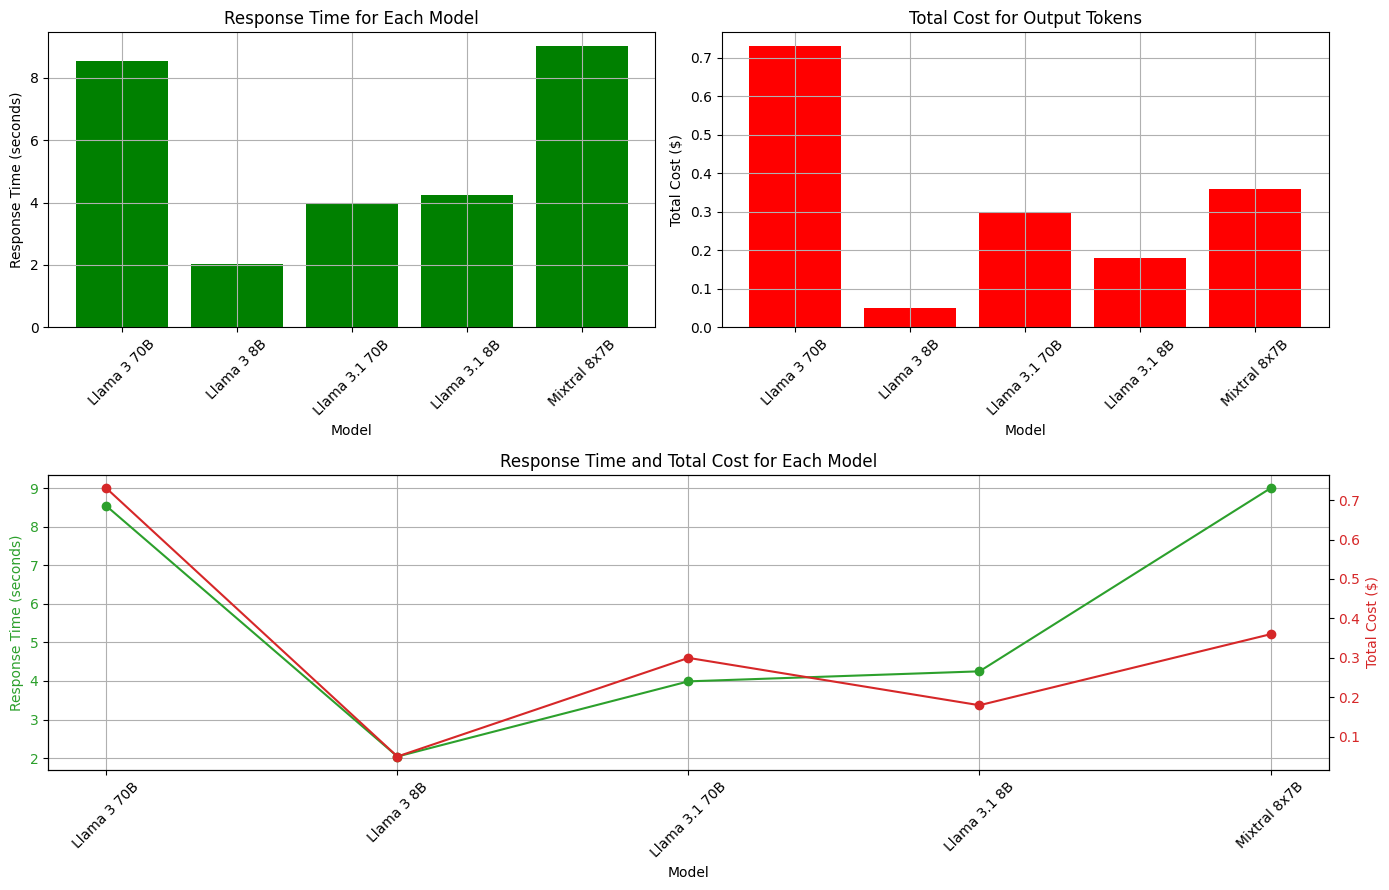

In [1]:
import matplotlib.pyplot as plt
import time
import random

# Model data
models = [
    {"name": "Llama 3 70B", "cost_per_million_tokens": 0.79},
    {"name": "Llama 3 8B", "cost_per_million_tokens": 0.08},
    {"name": "Llama 3.1 70B", "cost_per_million_tokens": 0.40},
    {"name": "Llama 3.1 8B", "cost_per_million_tokens": 0.40},
    {"name": "Mixtral 8x7B", "cost_per_million_tokens": 0.50},
]

def simulate_model_response(model_name):
    """Simulate running a prompt for a model and calculate response time."""
    start_time = time.time()
    # Simulate processing time with a random delay for each model
    time.sleep(random.uniform(1, 10))  # Simulated delay between 0.1 and 0.9 seconds
    end_time = time.time()
    response_time = end_time - start_time
    return round(response_time, 2)

def compute_cost(model, output_tokens):
    """Compute the cost based on the number of output tokens generated."""
    cost_per_million_tokens = model["cost_per_million_tokens"]
    cost = (cost_per_million_tokens / 1_000_000) * output_tokens
    return round(cost, 2)

def simulate_output_tokens(model_name):
    """Simulate the number of output tokens generated for a model."""
    # Simulate output tokens with a random value within a specified range
    if "70B" in model_name:
        return random.randint(700_000, 1_000_000)
    elif "8B" in model_name:
        return random.randint(400_000, 600_000)
    else:
        return random.randint(500_000, 800_000)

# Lists to store tokens generated and response times for each iteration
tokens_generated_list = []
response_times_list = []

# Compute response times, output tokens, and total cost for each model
for model in models:
    model["response_time"] = simulate_model_response(model["name"])
    model["output_tokens"] = simulate_output_tokens(model["name"])
    model["total_cost"] = compute_cost(model, model["output_tokens"])
    tokens_generated_list.append(model["output_tokens"])
    response_times_list.append(model["response_time"])
    print(f'{model["name"]}\nResponse_Time: {model["response_time"]} s\nOutput_Tokens: {model["output_tokens"]}\nTotal_Cost: ${model["total_cost"]}\n')

# Extract data for plotting
model_names = [model["name"] for model in models]
total_costs = [model["total_cost"] for model in models]

# Plotting the results
plt.figure(figsize=(14, 9))

# Bar chart for response times
plt.subplot(2, 2, 1)
plt.bar(model_names, response_times_list, color='g')
plt.title('Response Time for Each Model')
plt.xlabel('Model')
plt.ylabel('Response Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)

# Bar chart for total cost
plt.subplot(2, 2, 2)
plt.bar(model_names, total_costs, color='r')
plt.title('Total Cost for Output Tokens')
plt.xlabel('Model')
plt.ylabel('Total Cost ($)')
plt.xticks(rotation=45)
plt.grid(True)

# Combined line plot for response time and total cost
plt.subplot(2, 1, 2)
ax1 = plt.gca()
color = 'tab:green'
ax1.set_xlabel('Model')
ax1.set_ylabel('Response Time (seconds)', color=color)
ax1.plot(model_names, response_times_list, marker='o', linestyle='-', color=color, label='Response Time')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(len(model_names)))
ax1.set_xticklabels(model_names, rotation=45)
ax1.grid(True)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Cost ($)', color=color)  # we already handled the x-label with ax1
ax2.plot(model_names, total_costs, marker='o', linestyle='-', color=color, label='Total Cost')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Response Time and Total Cost for Each Model')

plt.tight_layout()
plt.show()

In [2]:
print(tokens_generated_list)

[927774, 581621, 758588, 450090, 719266]


In [3]:
print(response_times_list)

[8.54, 2.04, 3.99, 4.25, 9.0]
